In [65]:
%matplotlib inline

In [66]:
from __future__ import division
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import neighbors, datasets, feature_selection

In [103]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.describe()
iris.head()

AttributeError: 'Bunch' object has no attribute 'head'

In [68]:
# iris.target is the categories we are trying to classify with
print pd.Series(iris.target).value_counts()

2    50
1    50
0    50
dtype: int64


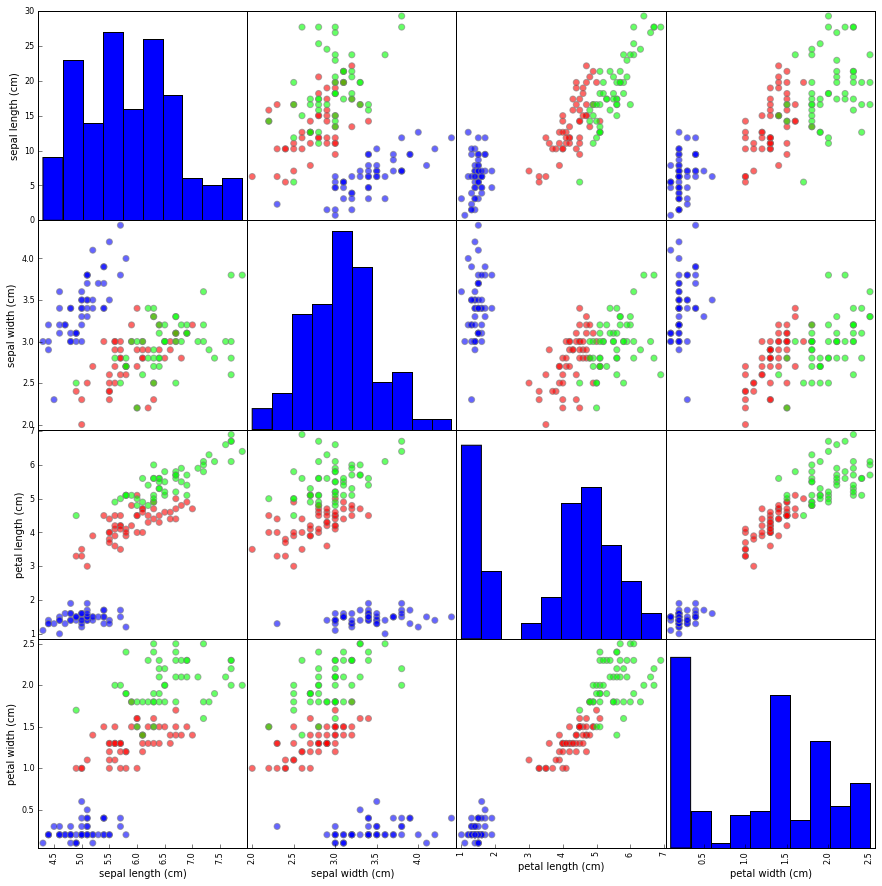

In [69]:
pd.scatter_matrix(iris_df, figsize=(15, 15), s=150, c=iris.target, alpha=0.6, cmap='brg', edgecolors='gray');

In [70]:
# Create the training (and test) set using scikit-learn's train_test_split function
# original split:
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=12)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=12)
# Try this sequence again with the following random seed.
# observe how it changes the scores of K quite dramatically
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=8)

In [71]:
# Loop through each neighbors value from 1 to 51 and append
# the scores
scores = []
n_neighbors = range(1, 6)
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n, weights='distance')
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

y_model_train = clf.predict(X_test)

print scores
# mean of scores
print np.mean(scores)


# n_neighbors = range(1, 51, 2)
# for n in n_neighbors:
#    clf = neighbors.KNeighborsClassifier(n)
#    clf.fit(X_train, y_train)
#    scores.append(clf.score(X_test, y_test))

[0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.96666666666666667]
0.98


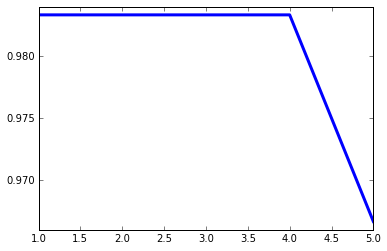

In [72]:
plt.plot(n_neighbors, scores, linewidth=3.0)
plt.xlabel="n_neighbors"
plt.ylabel="score"

# Let's double check the result with cross validation

The best score above occurs at `n_neighbors = 11`




In [73]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import cross_val_score

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

clf = neighbors.KNeighborsClassifier(11, weights='uniform')

clf.fit(iris.data[:, 2:4], iris.target)

scores = cross_val_score(clf, iris_df.values, iris.target, cv = 5)

In [74]:
print scores
print scores.mean()

[ 0.93333333  1.          1.          0.96666667  1.        ]
0.98


# Let's visualize the decision boundary

Let's look focus on the last two features.

In [98]:
clf = neighbors.KNeighborsClassifier(10, weights='uniform')

clf.fit(iris.data[:, 2:4], iris.target)

# KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_neighbors=11, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=10, p=2, weights='uniform')

In [99]:
h = 0.02  # mesh grid cell size

cmap_light = ListedColormap(['#FFAAAA', "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(['#FF0000', "#00FF00", "#0000FF"])

x_min, y_min = iris_df.min()[['petal length (cm)', 'petal width (cm)']]
x_max, y_max = iris_df.max()[['petal length (cm)', 'petal width (cm)']]

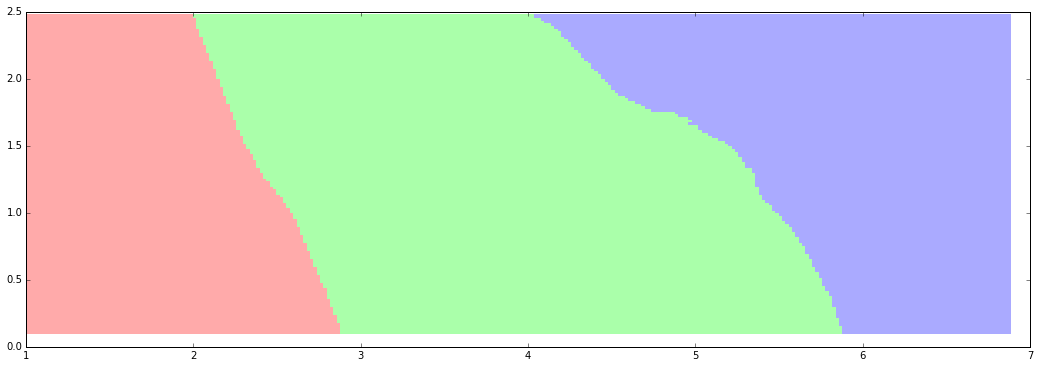

In [100]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(18,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

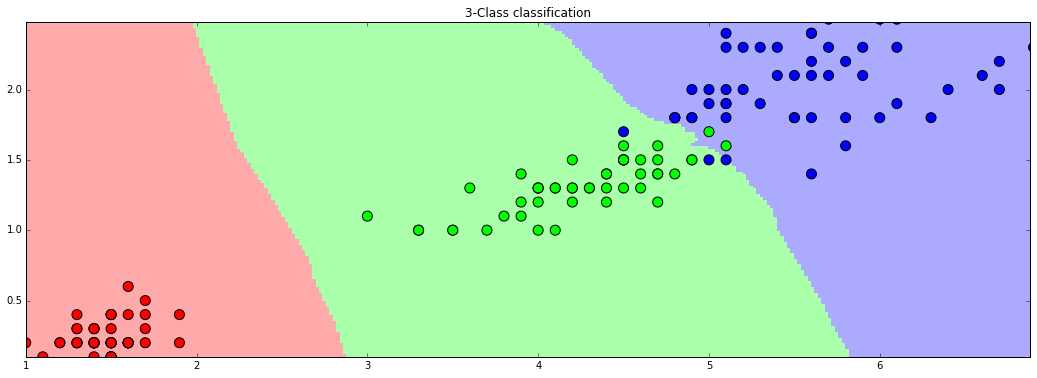

In [78]:
plt.figure(figsize=(18, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=iris.target, cmap=cmap_bold, s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel = "Petal Width (CM)"
plt.ylabel = "Petal Height (CM)"

plt.title("3-Class classification");

In [79]:
from sklearn import preprocessing

In [80]:
iris_norm = pd.DataFrame(preprocessing.scale(iris.data), columns=iris.feature_names)

In [81]:
iris_norm.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.657933e-15,-1.515825e-15,-8.052818e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


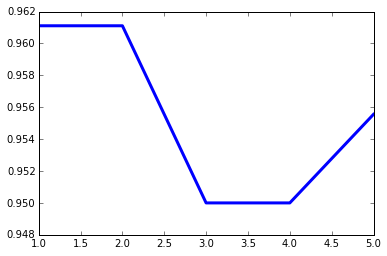

In [82]:
X_train, X_test, y_train, y_test = train_test_split(iris_norm.values, iris.target, test_size=0.3, random_state=12)

# Loop through each neighbors value from 1 to 51 and append
# the scores
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
#     scores.append(clf.score(X_test, y_test))
    net_score = cross_val_score(clf, iris_norm.values, iris.target, cv = 30)
    scores.append(net_score.mean())
    
plt.plot(n_neighbors, scores, linewidth=3.0)
plt.xlabel="n_neighbors"
plt.ylabel="score"

(150,)
(105,)


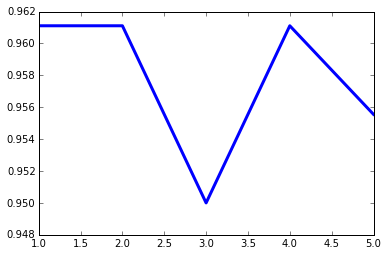

In [83]:
X_train, X_test, y_train, y_test = train_test_split(iris_norm.values, iris.target, test_size=0.3, random_state=12)

# Loop through each neighbors value from 1 to 51 and append
# the scores
scores = []

print iris.target.shape
print y_train.shape

for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n, weights='distance')
    clf.fit(X_train, y_train)
    net_score = cross_val_score(clf, iris_norm.values, iris.target, cv = 30)
    scores.append(net_score.mean())
    
plt.plot(n_neighbors, scores, linewidth=3.0)
plt.xlabel="n_neighbors"
plt.ylabel="score"

In [84]:
for i in range(2, 35):
    clf = neighbors.KNeighborsClassifier(i, weights='uniform')

    clf.fit(iris_norm.values, iris.target)

    scores = cross_val_score(clf, iris_norm.values, iris.target, cv = 10)

In [85]:
clf = neighbors.KNeighborsClassifier(10, weights='uniform')

clf.fit(iris_norm.values, iris.target)

scores = cross_val_score(clf, iris_norm.values, iris.target, cv = 10)

# What value of K seems the most reasonable?

Let's say k = 9 for uniform weights

In [86]:
from sklearn import metrics

print X_test.shape

metrics.f1_score(clf.predict(X_test), y_test)
pd.DataFrame(metrics.confusion_matrix(clf.predict(X_test), y_test), index=iris.target_names, columns=iris.target_names)

(45, 4)


,setosa,versicolor,virginica
setosa,20,0,0
versicolor,0,14,0
virginica,0,0,11


In [87]:
metrics.confusion_matrix(clf.predict(X_test), y_test)

array([[20,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 11]])

In [88]:
pd.crosstab(clf.predict(X_test), y_test)

col_0,0,1,2
row_0,,,
0,20,0,0
1,0,14,0
2,0,0,11


## Lab

In this lab you'll be predicting a type of wine from a variety of measurements including the wine's PH, alcohol content, and so on. You'll find the data for this information within `wine.data` and `wine.names` in the `Data` folder. Be sure to read the documentation on 

In groups of two answer solve the following problems:

### Part I: Building the model

1. Load the data into a dataframe just as you have with previous datasets.
2. Use `preprocessing.scale` to ensure the features of your data have a consistent scale
2. Generate a scatterplot matrix of the various attributes colored by the target variable (wine type)
3. From the scatterplot, pick the four best features that discriminate between classes.
3. Split your dataset into 70% training data and 30% test data
4. Build a KNN classifier, always remember to start with the simplest model first, so choose K=1 to start.
5. Plot the decision boundary.

### Part II: Exploring and improving the model

1. Increase K, and plot your classification accuracy on your testing dataset as a function of K. How does the f1 score change?
2. Repeat the process using distance based weighting and again plot how the f1 score changes.
3. Using the techniques you've learned so far, try to improve the accuracy of your model. I'd suggest first removing extra features in the data.

### Relevant info:
- You should consult the Scikit-Learn documentation on the KNN classifier and the `metrics` and `preprocessing` modules
